<center>
<h1>🌱 Plant Disease Classification using Deep Learning 🍅🌿</h1>

</center>

<center>
<h1>🎯 Project Description</h1>
</center>



In this project, we'll leverage the power of Deep Learning to detect and classify various plant diseases. Specifically, we'll be focusing on diseases in tomato plants.

With climate change and the increasing demand for food production, it's essential to enhance our agricultural practices. Detecting plant diseases early can lead to timely treatment, preventing losses and ensuring better yields. However, manual disease detection can be time-consuming and requires expertise.

Enter Deep Learning! By training a model on images of plant leaves, we can automate the disease detection process, making it more efficient and accessible.

Our dataset contains images of tomato leaves and stucture of my folder is: 

<center>
<h1> I will go through the following steps:</h1>
</center>

* 🔍 Data Exploration - visualize our data and check the distribution of different classes.
* 🧹 Data Preprocessing - load and preprocess our image data to make it suitable for a neural network.
* 🛠 Model Building - build a CNN model using TensorFlow and Keras.
* 🎯 Model Training - train our model on our dataset, using a separate validation set to monitor its performance.
* 📊 Model Evaluation - evaluate our model's performance on a separate test set.
* 🔄 Model Improvement - try different strategies to improve our model's performance.
* 🖼️ Result Visualization - visualize our results to make them interpretable.


In [5]:
# importing data analysis libraries
import os
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# import ML libraries
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# Defind paths and constans for the project

# Path
test_path = '../test_split/'
train_path = '../train_split/'

# Constants
BATCH_SIZE = 32
img_height = 180
img_width = 180
AUTOTUNE = tf.data.AUTOTUNE

<center>
<h1> 🔍 Data Exploration</h1>
</center>

### It's a time to load and split data into and see how many pictures and classes do we have:
* Training
* Validation
* Test

In [9]:
# loading training data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size= (img_height, img_width),
    batch_size= BATCH_SIZE
)
train_data
class_names = train_data.class_names
print(f'Number of 🍅 classes names for training set: {class_names}')

Found 3601 files belonging to 3 classes.
Using 2881 files for training.
Number of 🍅 classes names for training set: ['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']


In [12]:
key = {
    'early': 0,
    'late': 0,
    'healthy': 0
}

for i in train_data:
    for j in i[1]:
        if j == 0:
            key['early'] += 1
        elif j == 1:
            key['late'] += 1
        else:
            key['healthy'] += 1

key

{'early': 641, 'late': 1235, 'healthy': 1005}

In [13]:
# loading  validation data
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = BATCH_SIZE
)

validation_data
print(f'Number of 🍅 classes names for validation set: {validation_data.class_names}')

Found 3601 files belonging to 3 classes.
Using 720 files for validation.
Number of 🍅 classes names for validation set: ['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']


In [14]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE
)

test_data

Found 899 files belonging to 3 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
# finding all categories belloging to each folder and tomato class

def print_classes(directory, txt = ''):
    categories = os.listdir(directory)
    print(f'Number of classes: {len(categories)}')
    print(f'Classes: {txt}')
    num_of_cat = []
    for category in categories:
        print(f'🍅: {category}')
        num_of_cat.append(category)
    return num_of_cat

print_classes(train_path, 'Train')
print('-' * 30)
print_classes(test_path, 'Test')

Number of classes: 3
Classes: Train
🍅: Tomato___Late_blight
🍅: Tomato___healthy
🍅: Tomato___Early_blight
------------------------------
Number of classes: 3
Classes: Test
🍅: Tomato___Late_blight
🍅: Tomato___healthy
🍅: Tomato___Early_blight


['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight']

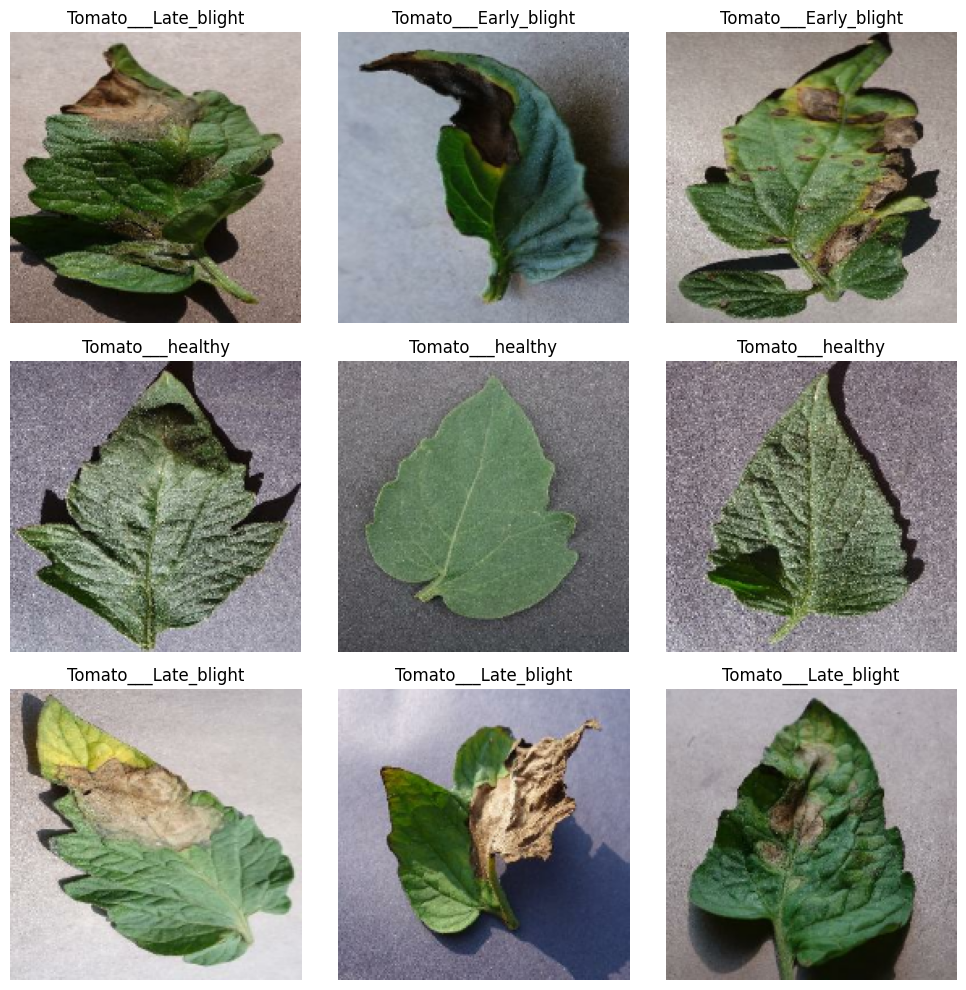

In [20]:
# defining function for ploting random images and thei lables to visualize dataset

def display_images(train_data, class_names):
    image_batch, label_batch = next(iter(train_data))


    fig, axes = plt.subplots(3, 3, figsize = (10, 10))
    axes = axes.flatten()

    for i in range(9):
        axes[i].imshow(image_batch[i].numpy().astype('uint8'))
        axes[i].set_title(class_names[label_batch[i]])

        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

display_images(train_data, class_names)

<center>
<h1> 🧹 Data Preprocessing</h1>
</center>

Let's normalize the images. The pixel values are in the [0, 255] range for each of the red, green, and blue channels. We can normalize these values to the [0, 1] range by using a Rescaling layer.

In [23]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_train_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))


print(f'Image: {image_batch[0].numpy()}')
print(f'Lables: {labels_batch}')

Image: [[[0.5613944  0.58100224 0.5966885 ]
  [0.5583007  0.5779085  0.5935948 ]
  [0.5591286  0.5787364  0.5944227 ]
  ...
  [0.5552096  0.5669743  0.5865821 ]
  [0.5438751  0.5556398  0.57524765]
  [0.52143687 0.5332016  0.5528094 ]]

 [[0.547146   0.56675386 0.58244014]
  [0.54405236 0.5636602  0.5793465 ]
  [0.5482499  0.56785774 0.583544  ]
  ...
  [0.524539   0.5363037  0.55591154]
  [0.5296601  0.5414248  0.56103265]
  [0.52465945 0.53642416 0.556032  ]]

 [[0.539695   0.55930287 0.57498914]
  [0.5366013  0.55620915 0.5718954 ]
  [0.5448802  0.56448805 0.5801743 ]
  ...
  [0.5141734  0.5259381  0.54554594]
  [0.52156866 0.53333336 0.5529412 ]
  [0.52156866 0.53333336 0.5529412 ]]

 ...

 [[0.46574202 0.48077485 0.42391163]
  [0.51737213 0.53240496 0.4756797 ]
  [0.45890838 0.47392914 0.41752577]
  ...
  [0.37453258 0.37453258 0.38237575]
  [0.36620092 0.36620092 0.37404406]
  [0.37167424 0.37167424 0.37951738]]

 [[0.54722315 0.5604258  0.5374194 ]
  [0.49612638 0.509329   0.486

2024-03-11 22:58:28.041197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2881]
	 [[{{node Placeholder/_4}}]]
2024-03-11 22:58:28.041510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2881]
	 [[{{node Placeholder/_4}}]]


<center>
<h1> 🛠 Model Building </h1>
</center>

In this step I will initialize a sequential model and then add several layers to it. First, I apply a rescaling layer to normalize the images again. Then I will add several convolutional layers, each followed by a max pooling layer, to extract features from the image data. After all layers defined I will compile model and define early_stopping.

In [24]:
# checking the shape of image before model creation
image_batch.shape[1:]

TensorShape([180, 180, 3])

In [25]:
# Model definition

def initialize_model():
    model = models.Sequential()

    model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape = image_batch.shape[1:]))

    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

    return model, early_stopping

In [26]:
# initializing model
model, early_stopping = initialize_model()

In [27]:
# Checking the summary for my model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        3

<center>
<h1> 🎯 Model Training </h1>
</center>

In [28]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
validation_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
# training model

history = model.fit(
    train_data,
    validation_data = validation_data,
    epochs = 50,
    verbose = 1,
    callbacks = [early_stopping]
)

Epoch 1/50


91/91 [==============================] - ETA: 0s - loss: 0.8043 - accuracy: 0.6102

2024-03-11 22:58:59.507335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [720]
	 [[{{node Placeholder/_4}}]]
2024-03-11 22:58:59.507708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [720]
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - 26s 273ms/step - loss: 0.8043 - accuracy: 0.6102 - val_loss: 0.4356 - val_accuracy: 0.8167
Epoch 2/50
91/91 [==============================] - 25s 272ms/step - loss: 0.3919 - accuracy: 0.8469 - val_loss: 0.3767 - val_accuracy: 0.8403
Epoch 3/50
91/91 [==============================] - 27s 298ms/step - loss: 0.3147 - accuracy: 0.8771 - val_loss: 0.3272 - val_accuracy: 0.8722
Epoch 4/50
91/91 [==============================] - 28s 308ms/step - loss: 0.2697 - accuracy: 0.8941 - val_loss: 0.2997 - val_accuracy: 0.8764
Epoch 5/50
91/91 [==============================] - 27s 295ms/step - loss: 0.2153 - accuracy: 0.9139 - val_loss: 0.2556 - val_accuracy: 0.8944
Epoch 6/50
91/91 [==============================] - 28s 308ms/step - loss: 0.1955 - accuracy: 0.9247 - val_loss: 0.5094 - val_accuracy: 0.8111
Epoch 7/50
91/91 [==============================] - 27s 297ms/step - loss: 0.2067 - accuracy: 0.9195 - val_loss: 0.2211 - val_accuracy: 0.9111
Epoch 8/50

In [31]:
# checking history keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
# checking all val_acc numbers
history.history['val_accuracy']

[0.8166666626930237,
 0.8402777910232544,
 0.8722222447395325,
 0.8763889074325562,
 0.894444465637207,
 0.8111110925674438,
 0.9111111164093018,
 0.9222221970558167,
 0.9069444537162781,
 0.9305555820465088,
 0.8680555820465088,
 0.9402777552604675,
 0.8402777910232544,
 0.9152777791023254,
 0.9236111044883728,
 0.9097222089767456,
 0.9319444298744202,
 0.9263888597488403,
 0.9291666746139526,
 0.9375,
 0.9208333492279053,
 0.9305555820465088]

In [35]:
# visualizing model performance on Training and Validation (accuracy/loss)

def plot_model_history(history):
    history_length = len(history.history['accuracy'])

    plt.figure(figsize = (15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(range(history_length), history.history['accuracy'], label = 'Training accuracy')
    plt.plot(range(history_length), history.history['val_accuracy'], label = 'Validation accuracy')
    plt.legend()
    plt.title('Training & Validation accuracy')



    plt.subplot(1, 2, 2)
    plt.plot(range(history_length), history.history['loss'], label = 'Training loss')
    plt.plot(range(history_length), history.history['val_loss'], label = 'Validation loss')
    plt.legend()
    plt.title('Training & Validation loss')
    plt.show()

plot_model_history(history)

In [37]:
test_accuracy = model.evaluate(test_data)

 1/29 [>.............................] - ETA: 1s - loss: 0.1695 - accuracy: 0.8750

29/29 [==============================] - 2s 65ms/step - loss: 0.1641 - accuracy: 0.9399


<center>
<h1> 📊 Model Evaluation </h1>
</center>

In [38]:
print(f'Accuracy on test data: {test_accuracy[1]}')

Accuracy on test data: 0.9399332404136658


<h4> Model test accuracy is already at **~93.3%**, but I would like to improve it and for this purpose I will use data augmendation. </h4>

<center>
<h1> 🔄 Model Improvement  </h1>
</center>

For this part I will got thought Data augmentation. 

Data augmentation is a strategy used in machine learning, particularly in the context of image processing, to increase the diversity of data available for training models, without actually collecting new data. I hope that this process helps improve model performance. 

I will perform: 
* RandomFlip
* RandomRotation
* RandomZoom
* RandomTranslation

In [40]:
augmentation_data = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    validation_split = 0.2
)

In [41]:
train_data_aug = augmentation_data.flow_from_directory(
    directory = '../train_split/',
    target_size = (img_height, img_width),
    color_mode = 'rgb',
    class_mode = "sparse",
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'training'
)

train_data_aug

Found 2882 images belonging to 3 classes.


In [42]:
def show_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

images, labels = next(train_data_aug)
labels = labels.astype('int32')

show_images(images, labels)

In [44]:
validation_data_aug = augmentation_data.flow_from_directory(
    directory = '../train_split/',
    target_size = (img_height, img_width),
    color_mode = "rgb",
    class_mode = "sparse",
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'validation'
)

validation_data_aug

Found 719 images belonging to 3 classes.


In [45]:
# checking if numbers match to original train_data
2882 + 719

3601

In [46]:
aug_model, aug_early_stoping = initialize_model()

In [47]:
new_history = aug_model.fit(
    train_data_aug,
    validation_data = validation_data_aug,
    epochs = 50,
    verbose = 1,
    callbacks = [aug_early_stoping]
)

Epoch 1/50


2024-03-11 23:09:32.854768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - ETA: 0s - loss: 0.8234 - accuracy: 0.6152

2024-03-11 23:10:04.587319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - 36s 392ms/step - loss: 0.8234 - accuracy: 0.6152 - val_loss: 0.5470 - val_accuracy: 0.7691
Epoch 2/50
91/91 [==============================] - 35s 382ms/step - loss: 0.4168 - accuracy: 0.8345 - val_loss: 0.4709 - val_accuracy: 0.8206
Epoch 3/50
91/91 [==============================] - 34s 377ms/step - loss: 0.3889 - accuracy: 0.8501 - val_loss: 0.3003 - val_accuracy: 0.8762
Epoch 4/50
91/91 [==============================] - 35s 386ms/step - loss: 0.2648 - accuracy: 0.8976 - val_loss: 0.2639 - val_accuracy: 0.8873
Epoch 5/50
91/91 [==============================] - 35s 380ms/step - loss: 0.2312 - accuracy: 0.9094 - val_loss: 0.2162 - val_accuracy: 0.9277
Epoch 6/50
91/91 [==============================] - 35s 384ms/step - loss: 0.2345 - accuracy: 0.9060 - val_loss: 0.2026 - val_accuracy: 0.9235
Epoch 7/50
91/91 [==============================] - 33s 360ms/step - loss: 0.1891 - accuracy: 0.9289 - val_loss: 0.1782 - val_accuracy: 0.9416
Epoch 8/50

In [48]:
# visualizing new results on augmented data
plot_model_history(new_history)

In [49]:
aug_test_accuracy = aug_model.evaluate(test_data)

29/29 [==============================] - 2s 63ms/step - loss: 0.0685 - accuracy: 0.9778


In [50]:
print(f'Accuracy on test data: {aug_test_accuracy[1]}')

Accuracy on test data: 0.9777530431747437


<center>
<h1> 🎯 Result interpretation </h1>
</center>

The use of data augmentation in my image classification task has shown improvement, the accuracy improved from **93.4%** to **94.9%**. However, the initial high accuracy of the model and possibly the already diverse training data may have influenced this.Here are a few reasons why the improvement might not be as significant as expected:

**Already High Accuracy**: The original model without data augmentation already achieved an accuracy of **93.4%**, which is quite high. As the model's performance increases, it becomes progressively harder to achieve large improvements.

**Sufficient Training Data**: I belive that my original dataset was already large and diverse enough, the benefits of data augmentation would be less noticeable.

**Relevant Augmentations**: Not all augmentations are equally beneficial for every problem I could apply this technique only for early class just to balance a data.

**Overfitting**: While data augmentation can help reduce overfitting, other factors can still lead to overfitting. These include the model's complexity, the presence of noise in the training data, and so on.

<center>
<h1> 🖼️ Result Visualization </h1>
</center>

1/1 [==============================] - 0s 96ms/step


2024-03-11 23:37:40.943966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [899]
	 [[{{node Placeholder/_4}}]]
2024-03-11 23:37:40.945033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [899]
	 [[{{node Placeholder/_0}}]]


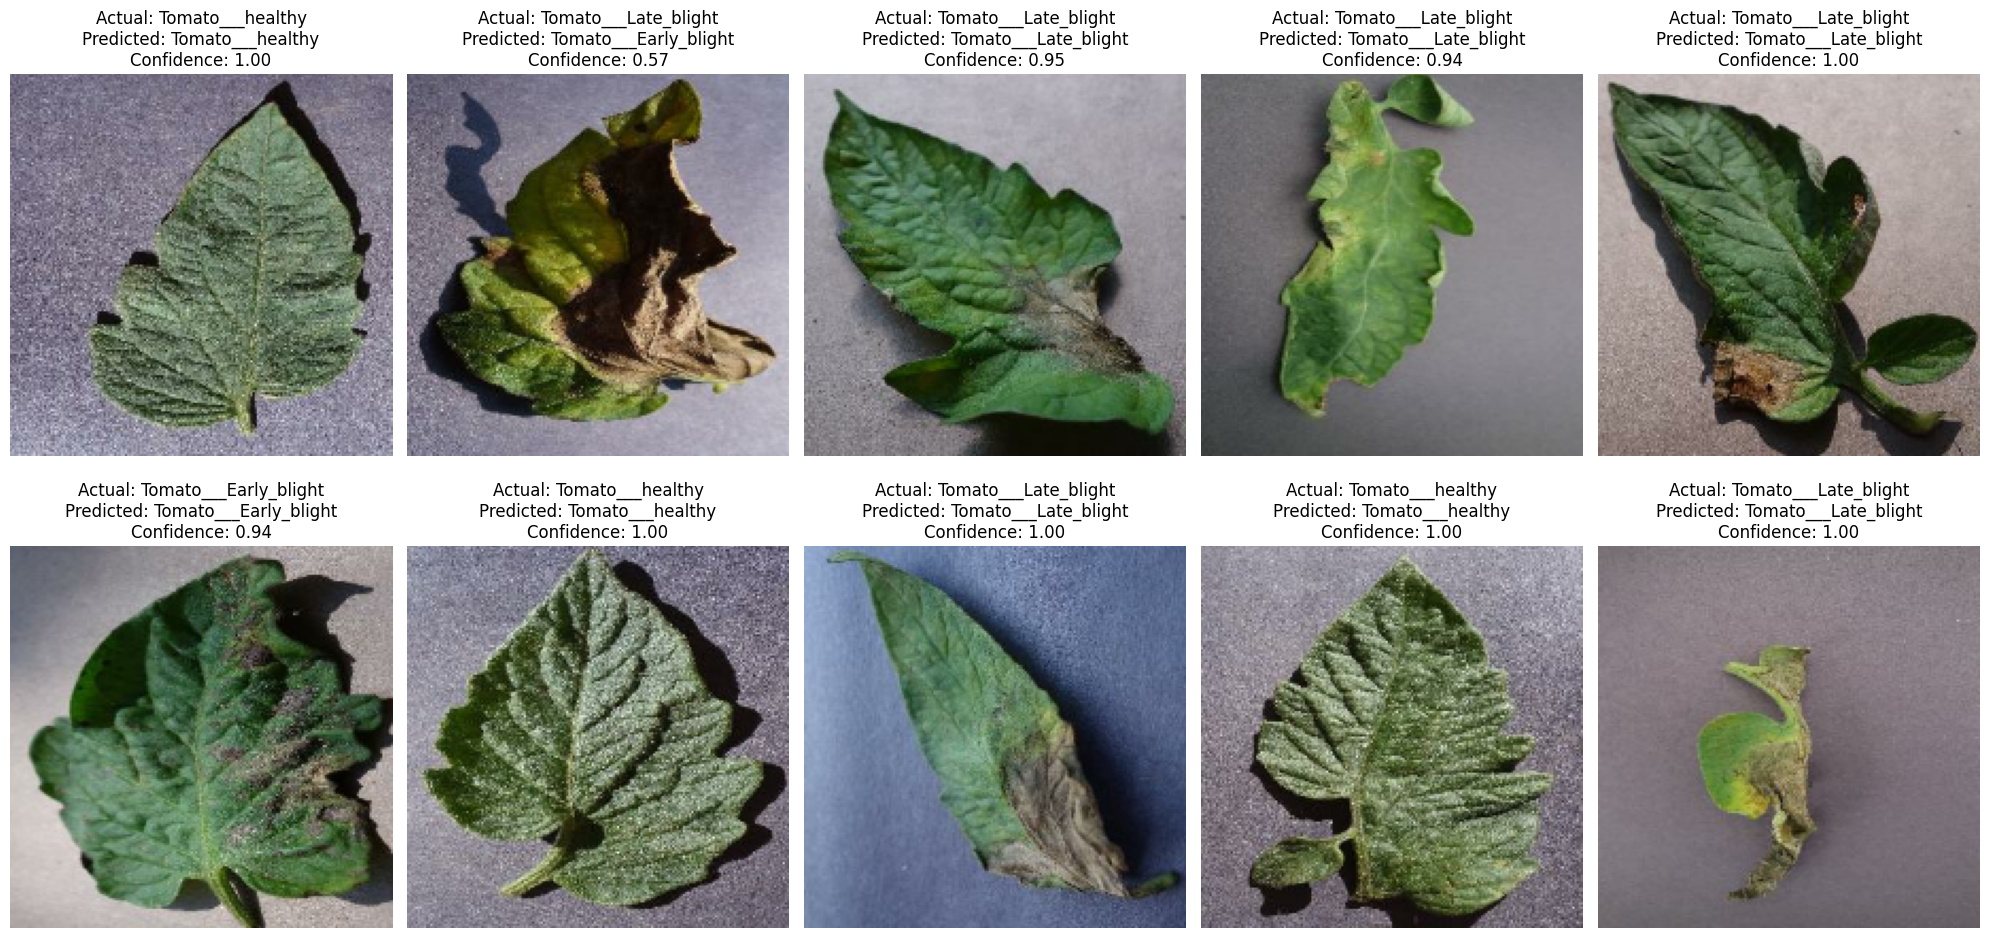

In [52]:
for images, labels in test_data.take(1):

    test_images = images.numpy()
    test_labels = labels.numpy()


    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    predicted_confidences = np.max(predictions, axis=1)


    test_labels_str = [class_names[i] for i in test_labels]
    predicted_labels_str = [class_names[i] for i in predicted_labels]

    plt.figure(figsize=(20, 10))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(test_images[i].astype("uint8"))
        plt.title(f"Actual: {test_labels_str[i]}\nPredicted: {predicted_labels_str[i]}\nConfidence: {predicted_confidences[i]:.2f}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [73]:
# Savind a model

model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_name = f'model_{now}'

model_path = os.path.join(model_dir, model_name)
model.save(model_path)

INFO:tensorflow:Assets written to: saved_models/model_2023-05-18_13-55-21/assets


INFO:tensorflow:Assets written to: saved_models/model_2023-05-18_13-55-21/assets


In [53]:
now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_name = f'model_{now}'
model.save(f'{model_name}.h5')